In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime

## Importation des données

In [2]:
caract_circo=pd.read_csv("C:/Users/Paul/Documents/GitHub/projetpython/1. Rassemblement des données/basefinale.csv",";")
caract_deputes=pd.read_csv("C:/Users/Paul/Documents/GitHub/projetpython/1. Rassemblement des données/caract_deputes.csv",";")
participation_deputes=pd.read_csv("C:/Users/Paul/Documents/GitHub/projetpython/1. Rassemblement des données/participation.csv",";")
twitter_deputes=pd.read_csv("C:/Users/Paul/Documents/GitHub/projetpython/1. Rassemblement des données/stats_twitter.csv",";")

C:\Users\Paul\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
tab_final=participation_deputes.drop(columns=['DEPSIR','mois','annee']).groupby('nom').sum().reset_index()
tab_final

,nom,amendements_adoptes,amendements_proposes,amendements_signes,commission_interventions,commission_presences,hemicycle_interventions,hemicycle_interventions_courtes,propositions_ecrites,propositions_signees,questions_ecrites,questions_orales,rapports,semaines_presence
0,Adrien Morenas,927,40,2711,100,217,32,14,0,50,66,4,3,111
1,Adrien Quatennens,214,3422,18270,620,172,887,446,2,147,134,31,0,142
2,Agnès Firmin Le Bodo,497,1287,7159,386,332,594,106,8,118,107,29,5,157
3,Agnès Thill,454,1282,4869,134,258,334,273,2,74,137,15,1,153
4,Aina Kuric,698,170,2249,27,152,122,10,1,57,52,5,3,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,Éric Diard,108,643,3218,124,187,428,359,10,178,73,13,2,138
558,Éric Girardin,985,137,2674,82,274,61,26,0,55,43,8,2,135
559,Éric Pauget,235,1271,9889,128,218,355,67,31,594,155,14,2,150
560,Éric Poulliat,1146,166,2079,82,222,213,65,0,51,27,5,4,132


In [4]:
tab_final=twitter_deputes.merge(tab_final,on='nom').drop(columns=["Unnamed: 0",'Mot prefere', 'twitter', 'date_scrap'])
tab_final=caract_deputes.merge(tab_final)
tab_final['date_naissance']=pd.to_datetime(tab_final['date_naissance'], format="%Y-%m-%d")
tab_final['mandat_debut']=pd.to_datetime(tab_final['mandat_debut'], format="%Y-%m-%d")
tab_final['mandat_fin']=pd.to_datetime(tab_final['mandat_fin'], format="%Y-%m-%d")
tab_final['age']=[(2022-s.year) for s in tab_final['date_naissance']]
tab_final['duree_mandat (sem)']=[(datetime.now()-s).days/7 for s in tab_final['date_naissance']]
#Certains députés sont en mandat depuis mon longtemps, on veut comparer ce qui est comparable
for name in ['semaines_presence','amendements_adoptes', 'amendements_proposes', 'amendements_signes','commission_interventions', 'commission_presences','hemicycle_interventions', 'hemicycle_interventions_courtes','propositions_ecrites', 'propositions_signees', 'questions_ecrites','questions_orales', 'rapports']:
    new_name=name+"/duree_mandat (sem)"
    tab_final[new_name]=tab_final[name]/tab_final['duree_mandat (sem)']

In [5]:
tab_final.columns

Index(['nom', 'nom_de_famille', 'prenom', 'sexe', 'date_naissance',
       'num_deptmt', 'nom_circo', 'num_circo', 'mandat_debut', 'mandat_fin',
       'ancien_depute', 'groupe_sigle', 'parti_ratt_financier',
       'autres_mandats', 'anciens_autres_mandats', 'nb_mandats', 'twitter',
       'ville_naissance', 'dep_naissance', 'profession', 'cat_soc_pro',
       'patrimoine', 'ancrage_local', 'DEPSIR', 'Tweets', 'Followers',
       'Following', 'Followers ratio', 'Listed', 'Replies/100derniers',
       'Tweets with @mentions/100derniers',
       'Tweets with #hashtags/100derniers', 'Retweets/100',
       'Tweets with links/100derniers', 'Tweets with media/100derniers',
       'amendements_adoptes', 'amendements_proposes', 'amendements_signes',
       'commission_interventions', 'commission_presences',
       'hemicycle_interventions', 'hemicycle_interventions_courtes',
       'propositions_ecrites', 'propositions_signees', 'questions_ecrites',
       'questions_orales', 'rapports', 'sem

## Méthodes centroïdes

In [31]:
data_kmeans=tab_final.drop(columns=['ancrage_local','mandat_debut','date_naissance','nom_de_famille', 'prenom','num_deptmt', 'nom_circo', 'num_circo','groupe_sigle', 'parti_ratt_financier','mandat_fin','autres_mandats', 'anciens_autres_mandats','twitter',
       'ville_naissance', 'dep_naissance', 'profession', 'cat_soc_pro', 'patrimoine','DEPSIR','Followers ratio','amendements_adoptes', 'amendements_proposes', 'amendements_signes',
       'commission_interventions', 'commission_presences',
       'hemicycle_interventions', 'hemicycle_interventions_courtes',
       'propositions_ecrites', 'propositions_signees', 'questions_ecrites',
       'questions_orales', 'rapports', 'semaines_presence','duree_mandat (sem)'])
data_kmeans.set_index("nom",inplace=True)

In [32]:
data_kmeans.columns

Index(['sexe', 'ancien_depute', 'nb_mandats', 'Tweets', 'Followers',
       'Following', 'Listed', 'Replies/100derniers',
       'Tweets with @mentions/100derniers',
       'Tweets with #hashtags/100derniers', 'Retweets/100',
       'Tweets with links/100derniers', 'Tweets with media/100derniers', 'age',
       'semaines_presence/duree_mandat (sem)',
       'amendements_adoptes/duree_mandat (sem)',
       'amendements_proposes/duree_mandat (sem)',
       'amendements_signes/duree_mandat (sem)',
       'commission_interventions/duree_mandat (sem)',
       'commission_presences/duree_mandat (sem)',
       'hemicycle_interventions/duree_mandat (sem)',
       'hemicycle_interventions_courtes/duree_mandat (sem)',
       'propositions_ecrites/duree_mandat (sem)',
       'propositions_signees/duree_mandat (sem)',
       'questions_ecrites/duree_mandat (sem)',
       'questions_orales/duree_mandat (sem)', 'rapports/duree_mandat (sem)'],
      dtype='object')

#### Méthode du coude

C:\Users\Paul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


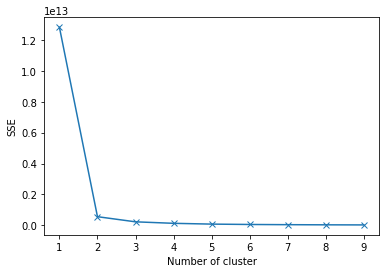

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_kmeans)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),marker='x')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [34]:
#On fait 3 clusters
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(data_kmeans)
data_kmeans['groupe_kmeans']=kmeans.labels_
data_kmeans[data_kmeans['groupe_kmeans']==0].index.to_list()

['Cédric Roussel',
 'Pascale Fontenel-Personne',
 'Guillaume Kasbarian',
 'Cyrille Isaac-Sibille',
 'Guillaume Vuilletet',
 'Olivier Faure',
 'Pierre-Alain Raphan',
 'Emmanuelle Anthoine',
 'Anne-Christine Lang',
 'Laurence Vichnievsky',
 'Barbara Bessot Ballot',
 'Laurent Saint-Martin',
 'Carole Bureau-Bonnard',
 'Annaïg Le Meur',
 'Jean-Paul Lecoq',
 'Bertrand Sorre',
 'Aurore Bergé',
 'Bruno Duvergé',
 'Christian Hutin',
 'Alain Tourret',
 'Paul Molac',
 'Christophe Euzet',
 'Jean-Marc Zulesi',
 'Damien Abad',
 'Fabrice Le Vigoureux',
 'Bertrand Pancher',
 'Anne-Laure Cattelot',
 'Mohamed Laqhila',
 'Loïc Kervran',
 'François-Michel Lambert',
 'Valérie Oppelt',
 'Bruno Questel',
 'Géraldine Bannier',
 'Xavier Breton',
 'Caroline Abadie',
 'Pierre Vatin',
 'Claire Pitollat',
 'Meyer Habib',
 'Philippe Gosselin',
 'Sylvain Waserman',
 'Rodrigue Kokouendo',
 'Cécile Rilhac',
 'Marietta Karamanli',
 'Joël Aviragnet',
 'Vincent Descoeur',
 'Valérie Gomez-Bassac',
 'Christian Jacob',
 'Ph

In [35]:
data_kmeans[data_kmeans['groupe_kmeans']==1].index.to_list()

['Jean-Luc Mélenchon', 'Marine Le Pen']

In [36]:
data_kmeans[data_kmeans['groupe_kmeans']==2].index.to_list()

['Martine Wonner',
 'Mounir Mahjoubi',
 'Éric Ciotti',
 'Jean-Christophe Lagarde',
 'François Ruffin',
 'Nicolas Dupont-Aignan',
 'Alexis Corbière',
 'Clémentine Autain',
 'Adrien Quatennens',
 'Cédric Villani',
 'Christophe Castaner',
 'Richard Ferrand']

In [ ]:
kmeans.

## Méthodes hiérarchiques

## Méthodes à densité


In [21]:
date1=tab_final["date_naissance"].iloc[1]
date2=tab_final["date_naissance"].iloc[2]
abs(date2-date1).week

AttributeError: 'Timedelta' object has no attribute 'week'

In [20]:
date2

Timestamp('1987-02-28 00:00:00')

In [22]:
datetime(2022,3,1)

datetime.datetime(2022, 3, 1, 0, 0)

In [9]:
help(datetime)

Help on class datetime in module datetime:

class datetime(date)
 |  datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
 |  
 |  The year, month and day arguments are required. tzinfo may be None, or an
 |  instance of a tzinfo subclass. The remaining arguments may be ints.
 |  
 |  Method resolution order:
 |      datetime
 |      date
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __radd__(self, value

datetime.datetime(2022, 1, 3, 18, 21, 24, 534570)